In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from scipy.ndimage import convolve

# Untuk menampilkan gambar inline di Colab
from google.colab.patches import cv2_imshow


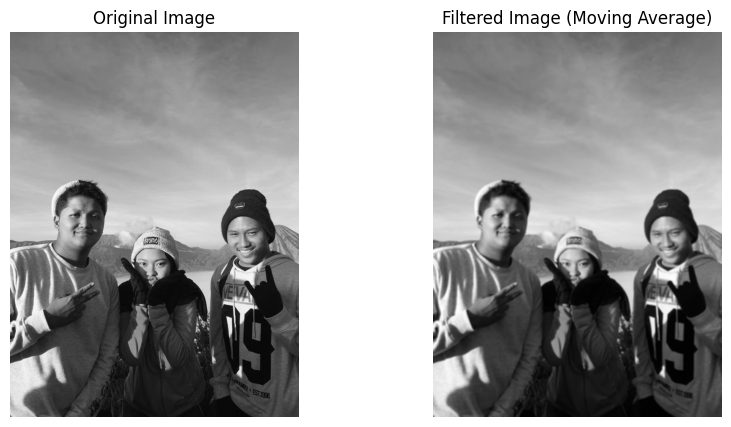

In [2]:
def moving_average_filter(image, kernel_size=5):
    # Membuat kernel Moving Average
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    # Menerapkan filter pada gambar menggunakan konvolusi
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# Membaca gambar
image = cv2.imread('/content/bromo.jpeg')  # Gantilah dengan path gambar Anda
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menerapkan Moving Average Filter
ma_image = moving_average_filter(gray_image)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filtered Image (Moving Average)")
plt.imshow(ma_image, cmap='gray')
plt.axis('off')
plt.show()

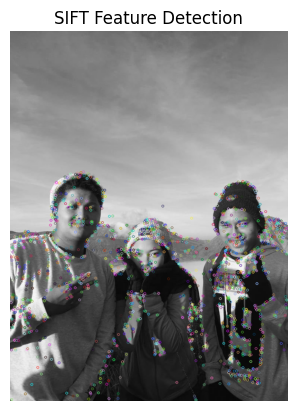

In [3]:
# Menggunakan SIFT untuk mendeteksi fitur
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Menampilkan gambar dengan keypoints
sift_image = cv2.drawKeypoints(gray_image, keypoints, None)

# Menampilkan hasil
plt.imshow(sift_image)
plt.title('SIFT Feature Detection')
plt.axis('off')
plt.show()


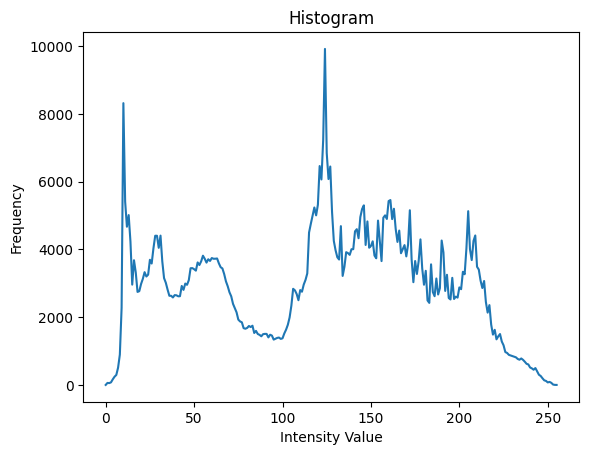

In [4]:
def plot_histogram(image):
    # Menghitung histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title('Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.show()

# Menampilkan histogram gambar asli
plot_histogram(gray_image)


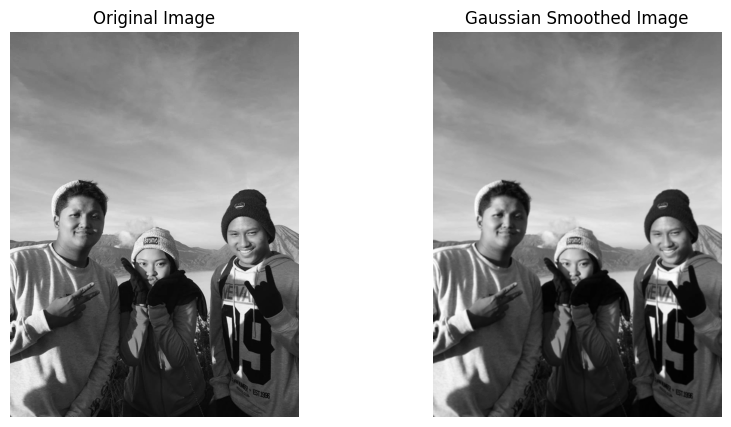

In [5]:
# Menerapkan Gaussian Smoothing
gaussian_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gaussian Smoothed Image")
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.show()


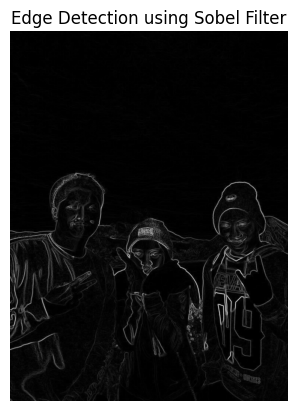

In [6]:
# Menerapkan Sobel Filter untuk deteksi tepi
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Menampilkan hasil
plt.imshow(sobel_edge, cmap='gray')
plt.title('Edge Detection using Sobel Filter')
plt.axis('off')
plt.show()


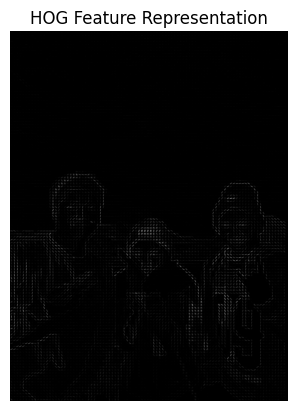

In [7]:
def compute_hog(image):
    # Menghitung HOG
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_image

# Menghitung dan menampilkan HOG
hog_image = compute_hog(gray_image)

# Menampilkan hasil
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Feature Representation')
plt.axis('off')
plt.show()
